<a href="https://colab.research.google.com/github/youngchanseo/Hon.Gong.Machine-SNU/blob/main/(03_1_3)_%ED%99%95%EC%9D%B8%EB%AC%B8%EC%A0%9C_p128.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

과대 적합과 과소 적합에 대한 이해를 돕기 위해 복잡한 모델과 단순한 모델을 만들겠습니다. 앞서 만든 k-최근접 이웃 회귀 모델의 k값을 1,5,10으로 바꿔가며 훈련해보세요.
그다음 농어의길이를 5에서 45까지 바꿔가며 예측을 만들어 그래프로 나타내 보세요. n이 커짐에 따라 모델이 단순해지는 것을 볼 수 있나요?

In [2]:
import numpy as np
perch_length = np.array([8.4, 13.7, 15.0, 16.2, 17.4, 18.0, 18.7, 19.0, 19.6, 20.0, 21.0,
       21.0, 21.0, 21.3, 22.0, 22.0, 22.0, 22.0, 22.0, 22.5, 22.5, 22.7,
       23.0, 23.5, 24.0, 24.0, 24.6, 25.0, 25.6, 26.5, 27.3, 27.5, 27.5,
       27.5, 28.0, 28.7, 30.0, 32.8, 34.5, 35.0, 36.5, 36.0, 37.0, 37.0,
       39.0, 39.0, 39.0, 40.0, 40.0, 40.0, 40.0, 42.0, 43.0, 43.0, 43.5,
       44.0])
perch_weight = np.array([5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 110.0,
       115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 130.0,
       150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 197.0,
       218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 514.0,
       556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 820.0,
       850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 1000.0,
       1000.0])

#아래 code: 농어 데이터를 훈련세트와 테스트 세트로 나눔
from sklearn.model_selection import train_test_split
train_input, test_input, train_target, test_target = train_test_split(perch_length, perch_weight, random_state =42)
# perch_length가 1차원이기에, 이를 나눈 train_input과 test_input도 1차원 배열임
train_input = train_input.reshape(-1,1)
test_input = test_input.reshape(-1,1)

x: [[ 5]
 [ 6]
 [ 7]
 [ 8]
 [ 9]
 [10]
 [11]
 [12]
 [13]
 [14]
 [15]
 [16]
 [17]
 [18]
 [19]
 [20]
 [21]
 [22]
 [23]
 [24]
 [25]
 [26]
 [27]
 [28]
 [29]
 [30]
 [31]
 [32]
 [33]
 [34]
 [35]
 [36]
 [37]
 [38]
 [39]
 [40]
 [41]
 [42]
 [43]
 [44]]
train_input(length): [[19.6]
 [22. ]
 [18.7]
 [17.4]
 [36. ]
 [25. ]
 [40. ]
 [39. ]
 [43. ]
 [22. ]
 [20. ]
 [22. ]
 [24. ]
 [27.5]
 [43. ]
 [40. ]
 [24. ]
 [21. ]
 [27.5]
 [40. ]
 [32.8]
 [26.5]
 [36.5]
 [13.7]
 [22.7]
 [15. ]
 [37. ]
 [35. ]
 [28.7]
 [23.5]
 [39. ]
 [21. ]
 [23. ]
 [22. ]
 [44. ]
 [22.5]
 [19. ]
 [37. ]
 [22. ]
 [25.6]
 [42. ]
 [34.5]]
train_input(length).shape: (42, 1)
train_target(weight): [  85.  135.   78.   70.  700.  180.  850.  820. 1000.  120.   85.  130.
  225.  260. 1100.  900.  145.  115.  265. 1015.  514.  218.  685.   32.
  145.   40.  690.  840.  300.  170.  650.  110.  150.  110. 1000.  150.
   80.  700.  120.  197. 1100.  556.]
train_target(weight).shape: (42,)
n: 1


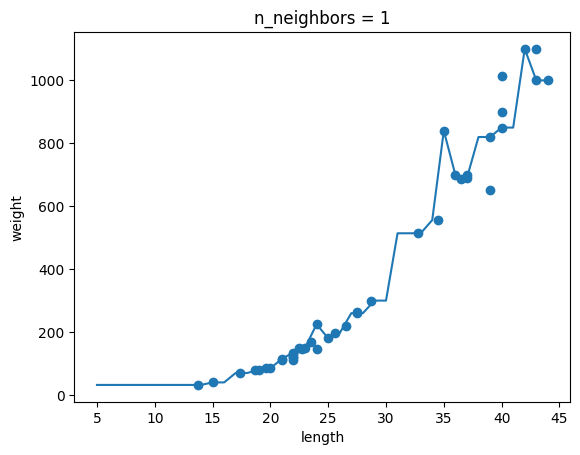

n: 5


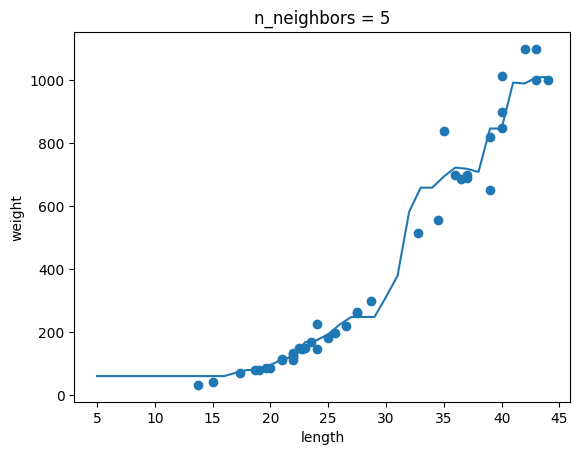

n: 10


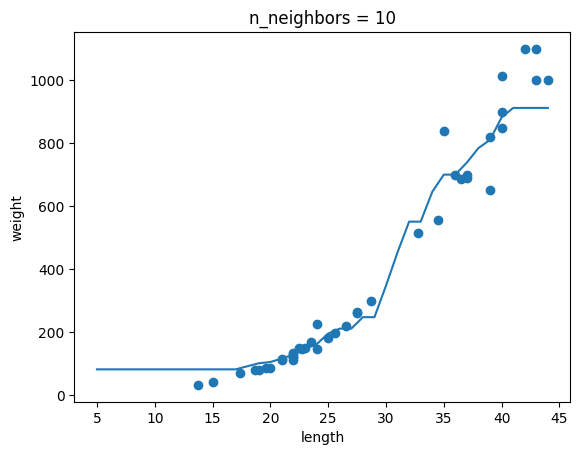

In [14]:
from sklearn.neighbors import KNeighborsRegressor
#k 최근접 이웃 회귀 객체를 만듭니다.
knr = KNeighborsRegressor()
#5부터 45까지 좌표를 만듭니다.
x= np.arange(5, 45).reshape(-1,1)
print("x:", x)
print("train_input(length):",train_input)
print("train_input(length).shape:",train_input.shape)
print("train_target(weight):",train_target)
print("train_target(weight).shape:",train_target.shape)

#n=1, 5, 10일때 예측 결과를 그래프로 그립니다.
for n in [1, 5, 10]:
  #모델을 훈련
  knr.n_neighbors= n
  print("n:", n)
  knr.fit(train_input, train_target)


  #지정한 범위 x에 대한 예측을 구합니다.
  prediction = knr.predict(x)

  #훈련세트와 예측 결과를 그래프로 그림
  import matplotlib.pyplot as plt
  plt.scatter(train_input, train_target)
  plt.plot(x, prediction)
  plt.title('n_neighbors = {}'.format(n))
  plt.xlabel('length')
  plt.ylabel('weight')
  plt.show()